<a href="https://colab.research.google.com/github/NguyenQuanManh/TTNT/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_tien=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
tien_set=train_tien.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Tien/Train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_tien.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Tien/Validation',
                                          target_size=(150,150), batch_size=32, class_mode='categorical')

Found 977 images belonging to 11 classes.
Found 115 images belonging to 11 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(tien_set, epochs=50, batch_size=128)

Epoch 1/50
31/31 [==============================] - 507s 16s/step - loss: 2.7509 - accuracy: 0.1044
Epoch 2/50
31/31 [==============================] - 19s 609ms/step - loss: 2.3815 - accuracy: 0.1290
Epoch 3/50
31/31 [==============================] - 19s 601ms/step - loss: 2.1742 - accuracy: 0.2139
Epoch 4/50
31/31 [==============================] - 20s 639ms/step - loss: 2.0401 - accuracy: 0.2375
Epoch 5/50
31/31 [==============================] - 19s 609ms/step - loss: 1.8276 - accuracy: 0.3286
Epoch 6/50
31/31 [==============================] - 19s 603ms/step - loss: 1.7867 - accuracy: 0.3327
Epoch 7/50
31/31 [==============================] - 19s 627ms/step - loss: 1.6366 - accuracy: 0.4002
Epoch 8/50
31/31 [==============================] - 20s 630ms/step - loss: 1.5514 - accuracy: 0.4381
Epoch 9/50
31/31 [==============================] - 19s 600ms/step - loss: 1.4549 - accuracy: 0.4882
Epoch 10/50
31/31 [==============================] - 18s 592ms/step - loss: 1.2893 - accurac

In [ ]:
model.save('Tien.h5')

In [ ]:
model_anh=load_model('/content/drive/MyDrive/Colab Notebooks/data/Tien/Tien.h5')

1/1 [==============================] - 0s 18ms/step
Đây là: 20k


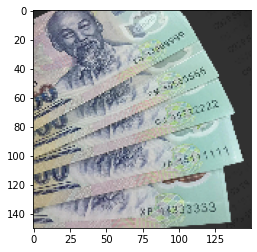

1/1 [==============================] - 0s 15ms/step
Đây là: 2k


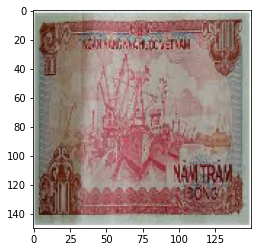

1/1 [==============================] - 0s 15ms/step
Đây là: 500d


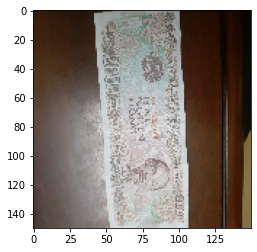

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/data/Tien/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_anh.predict(img)
  class_name=['100k','10k','1k','200k','200d','20k','2k','500k','500d','5k']
  a= int(np.argmax(model.predict(img),axis=1))
  print("Đây là:", class_name[a])
  plt.show()

1/1 [==============================] - 0s 16ms/step
Đây là: 500k


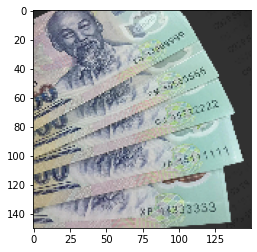

In [ ]:
from pickle import STOP
test="/content/drive/MyDrive/Colab Notebooks/data/Tien/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_anh.predict(img)
  class_name=['100k','10k','1k','200k','200d','20k','2k','500k','500d','5k']
  a= int(np.argmax(model.predict(img),axis=1))
  if round(result[0][7])==1:
    print("Đây là:", class_name[a])
    plt.show()
    break
  
  


In [ ]:
! jupyter nbconvert --to html /content/Tien.ipynb

[NbConvertApp] Converting notebook /content/Tien.ipynb to html
[NbConvertApp] Writing 812309 bytes to /content/Tien.html
